In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.svm import SVC

In [2]:
## Loading the dataset

## We have 2 csv files, one is train data and other is test data
## so we will load both the datasets


In [3]:
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

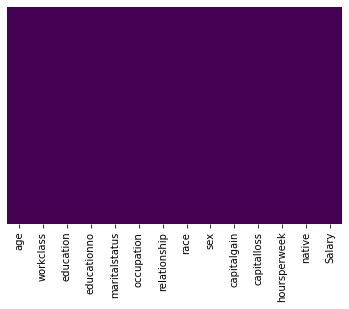

In [8]:
sns.heatmap(salary_train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [9]:
salary_train[salary_train.duplicated()].shape

(3258, 14)

In [10]:
print('No of rows before discarding duplicates=%d' % salary_train.shape[0])

salary_train=salary_train.drop_duplicates()

print('No of rows after discarding duplicates=%d' % salary_train.shape[0])


No of rows before discarding duplicates=30161
No of rows after discarding duplicates=26903


In [11]:
salary_test[salary_test.duplicated()].shape

(930, 14)

In [12]:
print('No of rows before discarding duplicates=%d' % salary_test.shape[0])

salary_test=salary_test.drop_duplicates()

print('No of rows after discarding duplicates=%d' % salary_test.shape[0])


No of rows before discarding duplicates=15060
No of rows after discarding duplicates=14130


In [13]:
## Getting Value counts for categorical Variables



In [14]:
def getValueCounts(df,feature):
    if df[feature].dtype=='object':
        print('\n Value counts for \n'+str(feature) ,df[feature].value_counts())    

In [15]:
for feature in salary_train.columns:
    if salary_train[feature].dtype=='object':
       ## print('\n' +str(feature) +'\sValue Counts are')
        getValueCounts(salary_train,str(feature))


 Value counts for 
workclass  Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

 Value counts for 
education  HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

 Value counts for 
maritalstatus  Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

 Value counts for 
occupation  Prof-specialty 

In [16]:
categorical_columns=salary_train.select_dtypes(exclude='number').columns
categorical_columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder=LabelEncoder()

In [19]:
salary_train['workclass']=label_encoder.fit_transform(salary_train['workclass'])
salary_train['education']=label_encoder.fit_transform(salary_train['education'])
salary_train['maritalstatus']=label_encoder.fit_transform(salary_train['maritalstatus'])
salary_train['occupation']=label_encoder.fit_transform(salary_train['occupation'])
salary_train['relationship']=label_encoder.fit_transform(salary_train['relationship'])
salary_train['race']=label_encoder.fit_transform(salary_train['race'])
salary_train['sex']=label_encoder.fit_transform(salary_train['sex'])
salary_train['native']=label_encoder.fit_transform(salary_train['native'])


In [20]:
salary_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [21]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [22]:
## Frequency counts of categorical variables for test data


In [23]:
def getValueCounts(df,feature):
    if df[feature].dtype=='object':
        print('\n Value counts for \n'+str(feature) ,df[feature].value_counts())    

In [24]:
for feature in salary_test.columns:
    if salary_test[feature].dtype=='object':
       ## print('\n' +str(feature) +'\sValue Counts are')
        getValueCounts(salary_test,str(feature))


 Value counts for 
workclass  Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: workclass, dtype: int64

 Value counts for 
education  HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

 Value counts for 
maritalstatus  Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2026
 Separated                 470
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

 Value counts for 
occupation  Prof-specialty       1

In [25]:
## Using Label Encoder on test data as well

salary_test['workclass']=label_encoder.fit_transform(salary_test['workclass'])
salary_test['education']=label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus']=label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']=label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship']=label_encoder.fit_transform(salary_test['relationship'])
salary_test['race']=label_encoder.fit_transform(salary_test['race'])
salary_test['sex']=label_encoder.fit_transform(salary_test['sex'])
salary_test['native']=label_encoder.fit_transform(salary_test['native'])


In [26]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [27]:
salary_test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

### Summary Statistics

In [28]:
salary_train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,2.217597,10.254135,10.144296,2.563394,6.053674,1.449578,3.645950,0.667621,1215.443259,98.427499,41.164591,35.228711
std,13.188825,0.996802,3.864670,2.620154,1.528599,4.026816,1.618758,0.871165,0.471075,7805.366384,425.493211,12.347051,6.272069
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,38.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

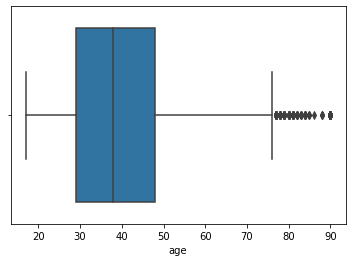

In [29]:
sns.boxplot(salary_train['age'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain'>

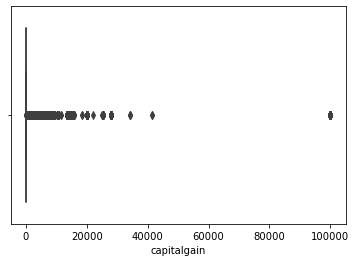

In [30]:
sns.boxplot(salary_train['capitalgain'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalloss'>

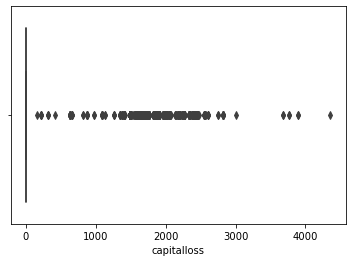

In [31]:
sns.boxplot(salary_train['capitalloss'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

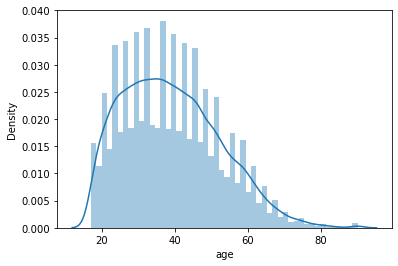

In [32]:
sns.distplot(salary_train['age'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

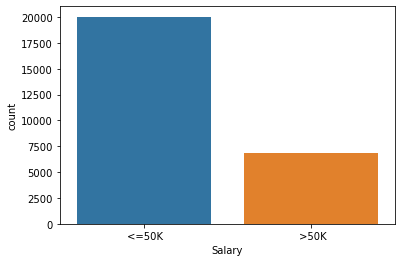

In [33]:
sns.countplot(salary_train['Salary'])

In [34]:
## We can notice there is lot of difference in the count for 
## salary<=50K and >50K


#### We can see the majority of the people are having Salary less than 50K. The data is imbalanced. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [37]:
x_train=salary_train.iloc[:,0:-1]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37
30155,22,2,15,10,4,10,1,4,1,0,0,40,37
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37


In [38]:
y_train=salary_train['Salary']
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30154      >50K
30155     <=50K
30156     <=50K
30158     <=50K
30160      >50K
Name: Salary, Length: 26903, dtype: object

In [39]:
sm=SMOTE(sampling_strategy='not majority')
x_resample,y_resample=sm.fit_resample(x_train,y_train)

In [40]:
print(x_resample.shape,y_resample.shape)

(40046, 13) (40046,)


In [41]:
y_df=pd.DataFrame(y_resample)
y_df.head()

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


<AxesSubplot:xlabel='Salary', ylabel='count'>

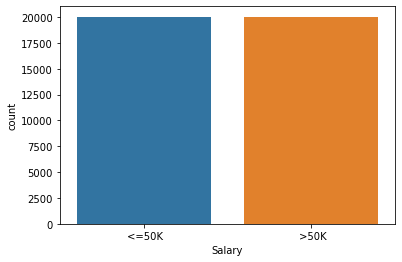

In [42]:
sns.countplot(x='Salary',data=y_df)

In [43]:
x_test=salary_test.iloc[:,0:-1]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [44]:
y_test=salary_test['Salary']
y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 14130, dtype: object

## Lets move ahead to model building

In [45]:
svm = SVC()
svm.fit(x_resample, y_resample)
y_pred_svm = svm.predict(x_test)

y_pred_svm

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [46]:
print(accuracy_score(y_test,y_pred_svm))

0.792002830856334


In [47]:
print(confusion_matrix(y_test,y_pred_svm))

[[10106   514]
 [ 2425  1085]]


In [48]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     10620
        >50K       0.68      0.31      0.42      3510

    accuracy                           0.79     14130
   macro avg       0.74      0.63      0.65     14130
weighted avg       0.77      0.79      0.76     14130



In [49]:
## Thus, we have prepared a classification model using SVM for salary data 